In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv("D:\subcarrier data\VS_dataset.csv",header=None)
data2 = pd.read_csv("D:\subcarrier data\WF_dataset.csv",header=None)
data3 = pd.read_csv("D:\subcarrier data\SOC_dataset.csv",header=None)
data4 = pd.read_csv("D:\subcarrier data\WS_dataset.csv",header=None)
data5 = pd.read_csv("D:\subcarrier data\Fog_dataset.csv",header=None)
data1.shape,data2.shape,data3.shape,data4.shape,data5.shape

((1001, 208), (1001, 639), (1001, 221), (1001, 995), (1001, 300))

In [ ]:
x1 = [i for i in range(0,208)]
x2 = [i for i in range(208,847)]
x3 = [i for i in range(847,1068)]
x4 = [i for i in range(1068,1068+995)]
x5 = [i for i in range(1068+995,1068+995+300)]

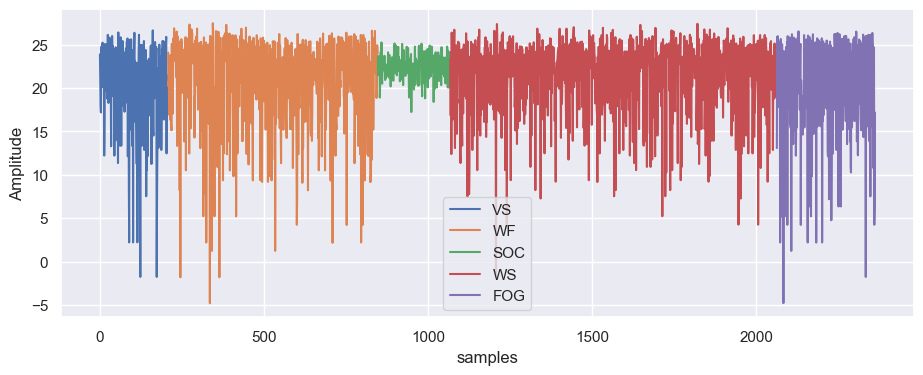

In [ ]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
plt.plot(x1,data1.iloc[1,:],label="VS")
plt.plot(x2,data2.iloc[1,:],label="WF")
plt.plot(x3,data3.iloc[1,:],label="SOC")
plt.plot(x4,data4.iloc[1,:],label="WS")
plt.plot(x5,data5.iloc[1,:],label="FOG")
plt.legend()
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [ ]:
# applying rolling window average filter to smooth the data

C:\Users\HP\AppData\Local\Temp\ipykernel_5528\597101422.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Int64Index([ 18,  20,  23,  30,  37,  43,  44,  48,  50,  54,  56,  60,  62,
             63,  69,  70,  71,  73,  75,  76,  77,  78,  79,  81,  82,  83,
             86,  87,  93,  96,  97,  98,  99, 100, 102, 103, 104, 105, 106,
            109, 110, 112, 113, 114, 115, 118, 119, 122, 124, 127, 128, 129,
            130, 133, 136, 138, 140, 141, 143, 144, 145, 146, 148, 149, 150,
            151, 152, 155, 156, 157, 158, 159, 164, 166, 167, 168, 169, 174,
            175, 176, 178, 179, 180, 181, 184, 186, 187, 189, 191, 192, 193,
            194, 195, 198, 200, 201, 203, 204, 206, 207],
           dtype='int64')
  data1_smooth = data1.rolling(window_size, min_periods=1).mean().iloc[1,:].values
C:\Users\HP\AppData\Local\T

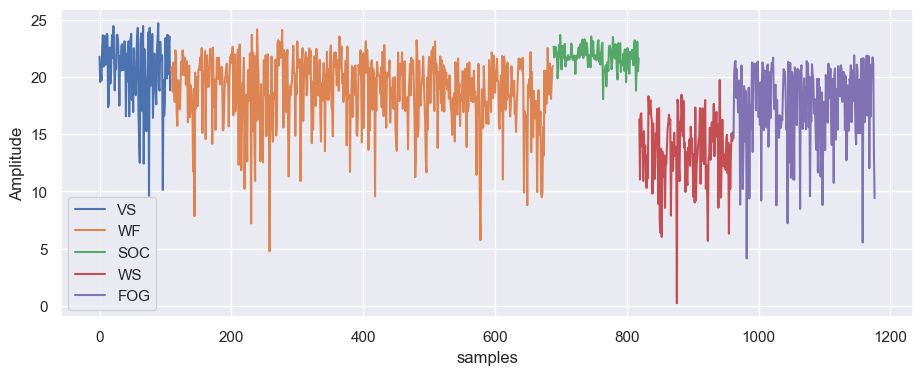

In [ ]:
# Specify window size
window_size = 10

# Apply rolling mean
data1_smooth = data1.rolling(window_size, min_periods=1).mean().iloc[1,:].values
data2_smooth = data2.rolling(window_size, min_periods=1).mean().iloc[1,:].values
data3_smooth = data3.rolling(window_size, min_periods=1).mean().iloc[1,:].values
data4_smooth = data4.rolling(window_size, min_periods=1).mean().iloc[1,:].values
data5_smooth = data5.rolling(window_size, min_periods=1).mean().iloc[1,:].values

x1_smooth = [i for i in range(0,108)]
x2_smooth = [i for i in range(108, 108+581)]
x3_smooth = [i for i in range(108+581,108+581+130)]
x4_smooth = [i for i in range(108+581+130,108+581+130+143)]
x5_smooth = [i for i in range(108+581+130+143,108+581+130+143+215)]

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
plt.plot(x1_smooth,data1_smooth,label="VS")
plt.plot(x2_smooth,data2_smooth,label="WF")
plt.plot(x3_smooth,data3_smooth,label="SOC")
plt.plot(x4_smooth,data4_smooth,label="WS")
plt.plot(x5_smooth,data5_smooth,label="FOG")
plt.legend()
plt.xlabel("samples")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [ ]:
                                      #3d plots using synthetic data

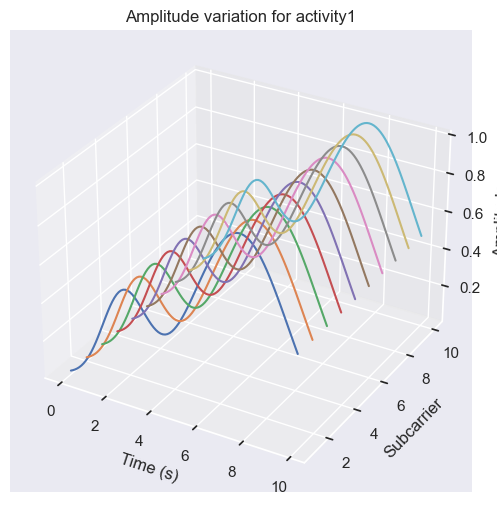

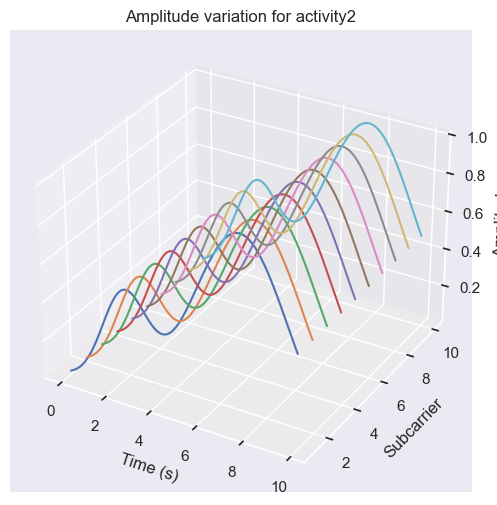

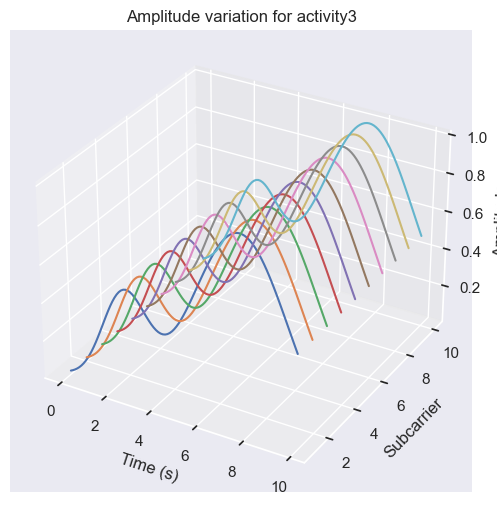

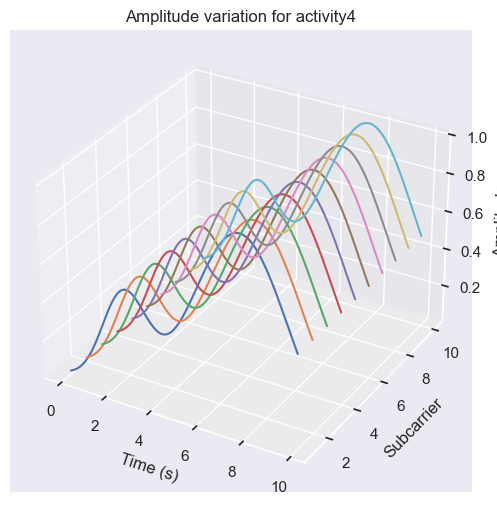

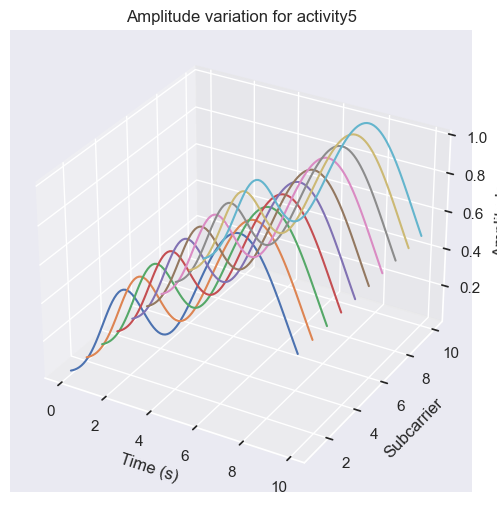

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the activities
activities = ['activity1', 'activity2', 'activity3', 'activity4', 'activity5']

# Number of subcarriers
num_subcarriers = 10

# Duration of simulation in seconds
duration = 10

# Time vector
t = np.arange(0, duration, 0.1)

# Amplitude matrix initialization
amplitudes = np.zeros((len(activities), num_subcarriers, len(t)))

# Define means and standard deviations for the two Gaussian functions
mean1 = duration / 4  # mean of the first Gaussian (position of first peak)
std_dev1 = duration / 10  # standard deviation of the first Gaussian (width of first peak)
mean2 = duration * 3 / 4  # mean of the second Gaussian (position of second peak)
std_dev2 = duration / 5  # standard deviation of the second Gaussian (width of second peak)

# Define the amplitudes of the two Gaussian functions
amp1 = 0.5  # amplitude of the first Gaussian (height of first peak)
amp2 = 1.0  # amplitude of the second Gaussian (height of second peak)

# Generate amplitudes
for i in range(len(activities)):
    for j in range(num_subcarriers):
        # The amplitude is a combination of two Gaussian functions
        gauss1 = amp1 * np.exp(-((t - mean1)**2) / (2 * std_dev1**2))
        gauss2 = amp2 * np.exp(-((t - mean2)**2) / (2 * std_dev2**2))
        amplitudes[i, j, :] = gauss1 + gauss2

# Plot the results
for i, activity in enumerate(activities):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f'Amplitude variation for {activity}')
    for j in range(num_subcarriers):
        ax.plot(t, np.full_like(t, j+1), amplitudes[i, j, :])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Subcarrier')
    ax.set_zlabel('Amplitude')
    plt.show()
